# Multiprocessing in Python

Here we will explore how to make use of multiple processes in python via the [multiprocessing library](https://docs.python.org/2/library/multiprocessing.html).

The multiprocessing Python module contains two classes capable of handling tasks. The Process class sends each task to a different processor, and the Pool class sends sets of tasks to different processors. We will show how to multiprocess the example code using both classes. Although both classes provide a similar speed increase, the Process class is more efficient in this case because there are not many processes to execute. Pool is most useful for large amounts of processes where each process can execute quickly, while Process is most useful for a small number of processes where each process would take a longer time to execute.



## Basic usage of multiprocessing library -- the Process class

To use the Process class, place the functions and calculations that are done on each list item in its own function that will take a list item as one of its arguments. Next, import the multiprocessing module, create a new process for each list item, and trigger each process in one call. We keep track of these processes by making a list and adding each process to it. After creating all the processes, take the separate output of each CPU and join them into a single list.

In the following example, we create two processes and try to operate on the same list inside of them.

In [3]:
import time
import multiprocessing 

def basic_func(x):
    if x == 0:
        return 'zero'
    elif x%2 == 0:
        return 'even'
    else:
        return 'odd'

def multiprocessing_func(x):
    y = x*x
    time.sleep(2)
    print('{} squared results in a/an {} number'.format(x, basic_func(y)))
    
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for i in range(0,10):
        p = multiprocessing.Process(target=multiprocessing_func, args=(i,))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
        
    print('That took {} seconds'.format(time.time() - starttime))

0 squared results in a/an zero number
1 squared results in a/an odd number
2 squared results in a/an even number
3 squared results in a/an odd number
4 squared results in a/an even number
5 squared results in a/an odd number
6 squared results in a/an even number
7 squared results in a/an odd number
8 squared results in a/an even number
9 squared results in a/an odd number
That took 2.1348626613616943 seconds


## Basic Usage of the Pool Class

To use the Pool class, we also have to create a separate function that takes a list item as an argument like we did when using Process. Then, using the multiprocessing module, create a Pool object called pool. This object has a function called map, which takes the function we want to multiprocess and the list as arguments and then iterates through the list for that function. After calling the function map, close the object to allow for a clean shutdown.

In [4]:
import time
import multiprocessing 

def basic_func(x):
    if x == 0:
        return 'zero'
    elif x%2 == 0:
        return 'even'
    else:
        return 'odd'

def multiprocessing_func(x):
    y = x*x
    time.sleep(2)
    print('{} squared results in a/an {} number'.format(x, basic_func(y)))
    
if __name__ == '__main__':
    
    starttime = time.time()
    pool = multiprocessing.Pool()
    pool.map(multiprocessing_func, range(0,10))
    pool.close()
    print('That took {} seconds'.format(time.time() - starttime))

1 squared results in a/an odd number
0 squared results in a/an zero number
2 squared results in a/an even number
3 squared results in a/an odd number
5 squared results in a/an odd number
4 squared results in a/an even number
6 squared results in a/an even number
7 squared results in a/an odd number
9 squared results in a/an odd number
8 squared results in a/an even number
That took 6.080142021179199 seconds


## Another simple example using the Process Class

In [ ]:
import multiprocessing as mp

def func(some_list):
  some_list.append("hello")
  print(some_list)


if __name__ == '__main__':
  some_list = []

  p1 = mp.Process(target=func, args=(some_list, ))
  p2 = mp.Process(target=func, args=(some_list, ))

  p1.start()
  p2.start()

  p1.join()
  p2.join()

  print(some_list)

As you can see, changes made to the list in the subprocesses are not visible in the main process. This is a result of the fact, that memory is copied on creation of the new process. There are few techniques to actually share information between processes.

Let's do something practical before we visit other functinalities of `multiprocessing`.

## Multiprocessing -- the Pool class
Allows for easy offloading of tasks to 'worker processes'.

Map functions keep the order of returned results. If you don't need it, use `imap_unordered` for optimization. You can also run tasks asynchronously with help of apply_async.

In [1]:
from time import sleep
import multiprocessing as mp

def f_sleep(x):
    sleep(2)
    return x*x


def f(x):
    return x*x


if __name__ == '__main__':
  
  with mp.Pool(processes=3) as pool:  # default number of processes: os.cpu_count()
    
    print(pool.map(f, range(10)))

    for i in pool.imap_unordered(f, range(10)):
        print(i)
        
    
    # run tasks asynchronously
    tasks = []   
    
    for i in range(10):
        tasks.append(pool.apply_async(f_sleep, args=(i, )))
        
    # timeout if fetching results takes too long
    for i in tasks:
        print(i.get(timeout=3))

  

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4
9
16
25
36
49
64
81
0
1
4
9
16
25
36
49
64
81


## Example - mandelbrot set
"Embarassingly parallel problem"

### Standard implementation

In [2]:
import matplotlib.pyplot as plt
from functools import partial
import time


def mandelbrotCalcRow(yPos, h, w, max_iteration = 1000):
    y0 = yPos * (2/float(h)) - 1 #rescale to -1 to 1
    row = []
    for xPos in range(w):
        x0 = xPos * (3.5/float(w)) - 2.5 #rescale to -2.5 to 1
        iteration, z = 0, 0 + 0j
        c = complex(x0, y0)
        while abs(z) < 2 and iteration < max_iteration:
            z = z**2 + c
            iteration += 1
        row.append(iteration)

    return row


def mandelbrotCalcSet(h, w, max_iteration = 1000):
    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
    mandelImg = list(map(partialCalcRow, range(h)))
    return mandelImg


if __name__ == '__main__':
    start_time = time.time()
    mandelImg = mandelbrotCalcSet(500, 400, 1000)
    print("Completed in: %s seconds" % (time.time() - start_time))
    
    plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
    plt.imshow(mandelImg,  interpolation='nearest', aspect='auto')
    

/Users/jhskone/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Completed in: 14.99233889579773 seconds


### Parallel implmentation
Let's use a pool of process to caluclate rows in parallel.


Completed in: 3.513144016265869 seconds


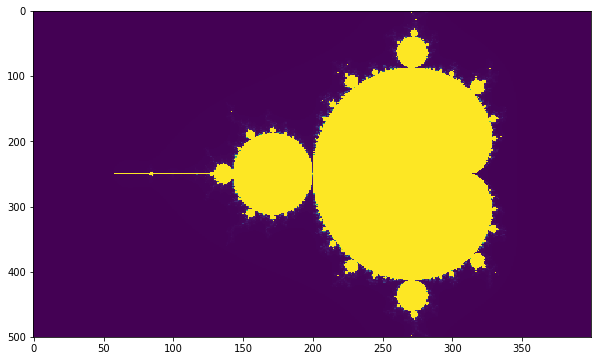

In [3]:
import multiprocessing as mp


def mandelbrotCalcSet(h, w, max_iteration = 1000):

    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
 
    pool = mp.Pool(processes=4)
    mandelImg = pool.map(partialCalcRow, range(h)) 
    pool.close()
    pool.join()
 
    return mandelImg


if __name__ == '__main__':
    start_time = time.time()
    mandelImg = mandelbrotCalcSet(500, 400, 1000)
    print("Completed in: %s seconds" % (time.time() - start_time))
    
    plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
    plt.imshow(mandelImg,  interpolation='nearest', aspect='auto')

We were able to achieve a significant speed-up.

## Exchanging data between processes

### Pipes
- objects have to be picklable
- pretty slow
- objects > 32MB might cause errors
- pipe is basically a buffer
- data might become corrupted if to processes write to the same end of the pipe at the same time
- implemented in os
- can be uni- or bi- dirctional

In this example we try to send data from the child process to the main process.

In [5]:
def func(conn):
    conn.send("Hi there, bud!")
    conn.close()
    

if __name__ == '__main__':

  one_end, second_end = mp.Pipe()

  for i in range(100):
      p = mp.Process(target=func, args=(second_end,))
      p.start()

  print(one_end.recv())
  p.join()

Hi there, bud!


### Queue
- higher level than pipes, safer
- can store python objects
- slow


In [35]:
def func(results):
    results.put(["An answer is 42"])
    
if __name__ == '__main__':

  results = mp.Queue()

  p1 = mp.Process(target=func, args=(results, ))
  p1.start()

  print(results.get())
  p1.join()

['An answer is 42']


## Synchronization

To ilustrate synchronization mechanisms, we use shared memory explained later in this notebook.

### Trivial example
Sometimes we want to ensure some resources are not used by multiple processes at the same time. In this example, process are waiting for lock to be released in order not to mix up their output.

Other examples: database, files.

In [9]:
import multiprocessing as mp

def f(lock, i):
    lock.acquire()
    try:
        print('hello world', i)
    finally:
        lock.release()

if __name__ == '__main__':
    lock = mp.Lock()

    for num in range(2):
        mp.Process(target=f, args=(lock, num)).start()

hello world 0
hello world 1


### Why is it important?

Unsupervised access to shared resources may cause unexpected behaviour, such as presented below. In theory, we should add 1 to `num` value 2000 times, resulting in `num` equaling to 2000 and change sign of `arr` array elements 2000 times, leaving them positive. When you run the cell below, you should notice `num` value beeing lower and `arr` elements having different signs. See `Sharing state` below for more information about Value and Array classes.

**Warning:** This example might not run at your machine due to open processes limit.

In [12]:
import multiprocessing as mp


def f(n, a):
    n.value += 1;
    for i in range(len(a)):
        a[i] = -a[i]

        
if __name__ == '__main__':
    num = mp.Value('d', 0.0)
    arr = mp.Array('i', range(10))

    processes = []
    
    for i in range(1, 2000):
        p = mp.Process(target=f, args=(num, arr))
        p.start()
        processes.append(p)
    
    print(num.value)
    print(arr[:])
    

1997.0
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


## Sharing state

In general, you should design your software to avoid sharing memory between process. If the use case requires it, multiprocessing provides a way to share memory spaces.

### Shared memory

- uses c-like memory representation there are only Arrays and Values.
- see multiprocessing.csharedtypes for more
- see resources for use with numpy arrays

In [53]:

def f(n, a, lock):
    lock.acquire()
    n.value = 3.1415927
    lock.release()
    for i in range(len(a)):
        a[i] = -a[i]

if __name__ == '__main__':
    num = mp.Value('d', 0.0)
    arr = mp.Array('i', range(10))

    p = mp.Process(target=f, args=(num, arr))
    p.start()
    p.join()

    print(num.value)
    print(arr[:])

3.1415927
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


### Server process

Less performance but can be used with any pickle'able object.

In [13]:
from multiprocessing import Process, Manager

def f(d, l):
    d[1] = '1'
    d['2'] = 2
    d[0.25] = None
    l.reverse()

if __name__ == '__main__':
    with Manager() as manager:
        d = manager.dict()
        l = manager.list(range(10))

        p = Process(target=f, args=(d, l))
        p.start()
        p.join()

        print(d)
        print(l)

{1: '1', '2': 2, 0.25: None}
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
